# Simulaciones de Monte Carlo-Metrópolis (Newman $\S$ 10.3)

* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

<div>
<img src="attachment:ni%C3%B1os_playa.png" width="400"/>
</div>

## Método de cadenas de Markov

- Se usa para casos en los que no se conoce la función de partición _Z_
- Cadena de Markov: Secuencia de estados donde la probabilidad para el estado siguiente solo depende de los estado actual.
- Para elegir el conjunto de estados para evaluar se va a ir generando una secuencia de estados: $i \rightarrow j$
- En vez de elegir un estado de manera aleatoria se toma el estado actual y se le hace un pequeño cambio para obtener un estado nuevo.
- Se genera un conjunto de probabilidades de transición $T_{ij}$
- Para un conjunto de probabilidades de transición adecuadas, el sistema simulado a través de la cadena de Markov se comporta según la distribución de Maxwell-Boltzmann.
- Las probabilidades de transición deben cumplir estar normalizadas:

\begin{align}
    \sum_j^N T_{ij} &= 1
\end{align}

Para un sistema en equilibrio termodinámico se cumple que:

\begin{align}
    \dfrac{T_{ij}}{T_{ji}} &= \dfrac{P(E_{j})}{P(E_{i})} = \dfrac{\frac{e^{-\beta E_j}}{Z}}{\frac{e^{-\beta E_i}}{Z}} = e^{-\beta(E_j - E_i)} \\
\end{align}

Por el principio del balance detallado:

\begin{align}
    P(E_i)T_{ij} = P(E_j)T_{ji}
\end{align}

Entonces, la probabilidad pasar a un estado _j_ es:

\begin{align}
    \sum_i T_{ij}P(E_i) = \sum_i T_{ji}P(E_j) = P(E_j)\sum_i T_{ij} = P(E_j)
\end{align}

Por lo tanto se puede usar esta técnica para simular el sistema de la siguiente manera: Se inicia el sistema en un estado aleatorio y se sigue la cadena de Markov. La distribución de estados eventualmente converge a la distribución de Maxwell-Boltzmann.


## Algoritmo Metrópolis

¿Cuál es el conjunto de $T_{ij}$ adecuados?

- Se permite que un estado pueda ser visitado varias veces.
- Hay probabilidad de quedarse en el mismo estado: $T_{ii} \neq 0$
- Se escoge uno de los estados para el próximo paso usando una distribución uniforme.
- Se acepta o se rechaza el nuevo estado con probabilidad:
\begin{align}
    P_a = \begin{cases}
        1 & \text{si $E_j \leq E_i$,}\\
        e^{-\beta(E_j - E_i)} & \text{si $E_j$ > $E_i$}
      \end{cases}
      \label{pa}
\end{align}

Es decir:
- Se acepta el cambio de estado si la energía del nuevo estado es menor o igual a la energía actual.
- Si la nueva energía es mayor, se acepta el cambio con probabilidad $e^{-\beta(E_j - E_i)}$


### Algoritmo
1. Se elige un estado inicial
2. Se escoge mediante una distribución aleatoria uniforme un estado entre el conjunto de estados posibles.
3. Se calcula la probabilidad de aceptación $P_a$:

\begin{align}
P_a = \begin{cases}
        1 & \text{si $E_j \leq E_i$,}\\
        e^{-\beta(E_j - E_i)} & \text{si $E_j$ > $E_i$}
      \end{cases}
\end{align}

4. Usando la probabilidad $P_a$ se acepta el movimiento o se rechaza
5. Se mide la cantidad de interés X y se acumula.
6. Se repite desde el paso 2.

## Ejemplo: Simulación de un gas ideal

Se define un gas de partículas con masa $m$ confinadas a una caja cúbica de longitud $L$. Los estados de este sistema cuántico se definen usando tres números cuánticos enteros $n_x$, $n_y$ y $n_z$.
La energía del sistema está determinada por:
\begin{equation}
E_i(n_x, n_y, n_z) = \dfrac{\pi^2 \hbar^2}{2mL}(n_x^2 + n_y^2 + n_z^2)
\label{E}
\end{equation}

Para un gas en el que no hay interacción entre partículas, la energía total del sistema es la suma de las energías de cada partícula:
\begin{equation}
E = \sum_{i=1}^{N}E_i(n_x, n_y, n_z)
\end{equation}

- Se va a usar la simulación de Monte Carlo del gas ideal para encontrar la energía interna del gas.
- Para implementar el algoritmo Metrópolis debe establecerse un conjunto de posibles "movimientos" del sistema. Los posibles estados del sistema serán aquellos donde los números cuánticos difieren por $\pm 1$ respecto al estado original.
- Calcule $\Delta E$ cuando el número cuántico $n_x$ de la partícula $i$ cambia en $\pm 1$

### Se escribe una rutina que calcula la simulación para $N = 1000$ partículas cuando $k_BT = 10$. Para simplificar los cálculos se toma un sistema de unidades donde $m = \hbar = 1$ y se establece el largo de la caja como $L = 1$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# Parámetros de la simulación
temperatura = 10.0
nParticulas = 100
nPasos = 20000

# Arreglo para almacenar los números cuánticos
arregloEstados = np.ones([nParticulas, 3], np.int32)

# Ciclo principal
listaGrafico = []
valorE = 3*nParticulas*(np.pi**2)/2

for k in range(nPasos):
    
    # Se escoge la partícula a "mover"
    iPart = rng.integers(nParticulas)
    jNumCuantico = rng.integers(3)
    
    # Se elije aleatoriamente si disminuye o aumenta el número cuántico
    # de forma correspondiente, se calcula el cambio en la energía
    if rng.random() < 0.5:
        deltaN = +1
        deltaE = (2*arregloEstados[iPart, jNumCuantico]+1)*(np.pi**2)/2
    else:
        deltaN = -1
        deltaE = (-2*arregloEstados[iPart, jNumCuantico]+1)*(np.pi**2)/2

    # Si la energía del nuevo estado es menor...
    if arregloEstados[iPart, jNumCuantico] > 1 or deltaN == +1:
        # Se aplica la técnica de Monte-Carlo para decidir si se pasa al nuevo estado
        if rng.random() < np.exp(-deltaE/temperatura):
            arregloEstados[iPart, jNumCuantico] += deltaN
            valorE += deltaE
    else:
        continue
    
    # Cantidad física que interesa medir
    listaGrafico.append(valorE)
    
# Gráfico
fig, ax = plt.subplots(dpi=120)
ax.plot(listaGrafico)
ax.set_title('Simulación de Monte Carlo de un gas ideal')
ax.set_xlabel('pasos')
ax.set_ylabel('Energía')
plt.show()

## Modelo de Ising (Landau y Giordano)

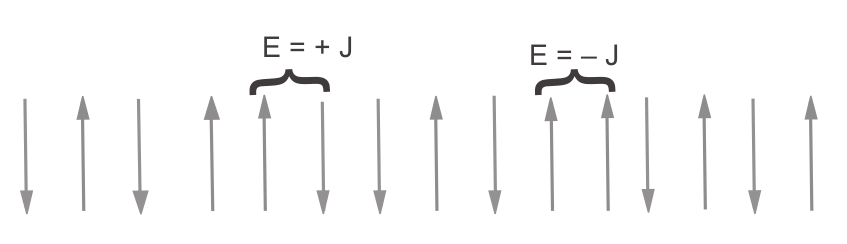

El modelo consiste en una rejilla de $N$ espines. Por simplicidad se consideran únicamente dos direcciones para los espines $s_i = \pm \dfrac{1}{2}$.

La configuración del sistema está descrita por el vector estado
\begin{equation}
|\alpha_j\rangle = |s_1, s_2, \ldots, s_N \rangle = \left\{\pm \dfrac{1}{2}, \pm \dfrac{1}{2}, \ldots\right\}, \> j = 1,2,\ldots, 2^N.
\end{equation}

Se asume que los espines interactúan con sus vecinos más próximos a través de interacciones dipolo-dipolo, así como con un campo magnético externo ${\bf B}$:
\begin{equation}
V_i = -J{\bf s}_i\cdot{\bf s}_{i+1} - g\mu_b{\bf s_i}\cdot{\bf B}
\end{equation}

El parámetro **J** es la energía de intercambio, **g** es la razón giromagnética y $\mu_b = \dfrac{e\hbar}{2m_ec}$ es el magnetón de Bohr.

La energía y la magnetización de este sistema en el estado $\alpha_k$ es:
\begin{align}
E_{\alpha_{k}} &= \Bigl\langle \alpha_{k} \Bigl| \sum_{i} V_i \Bigr| \alpha_k \Bigr\rangle\\ 
&= -J \sum_{i=1}^{N-1} s_i~s_{i+1} - B\mu_{b}\sum_{i=1}^{N}s_i\\
\mathcal{M}_{j} &= \sum_{i=1}^N s_i
\end{align}

De esta manera, existen $2^N$ posibles configuraciones del sistema, es decir, estados.

Para este sistema la alineación de equilibrio depende de signo del parámetro $J$:
- Si $J > 0$ el estado de mas baja energía va a tender a tener los espines vecinos alineados. Este es el comportamiento de un material $\textit{ferromagnético}$.
- Si $J < 0$ pasa lo contrario, los espines vecinos van a tender a tener alineaciones opuestas, esto es el comportamiento de un material $\textit{antiferromagnético}$.

Por simplicidad, también se asume $\mathbf{B} = 0$ y que el sistema representa un $\textit{ensamble canónico}$ en el que las variables del sistema permanecen fijas.

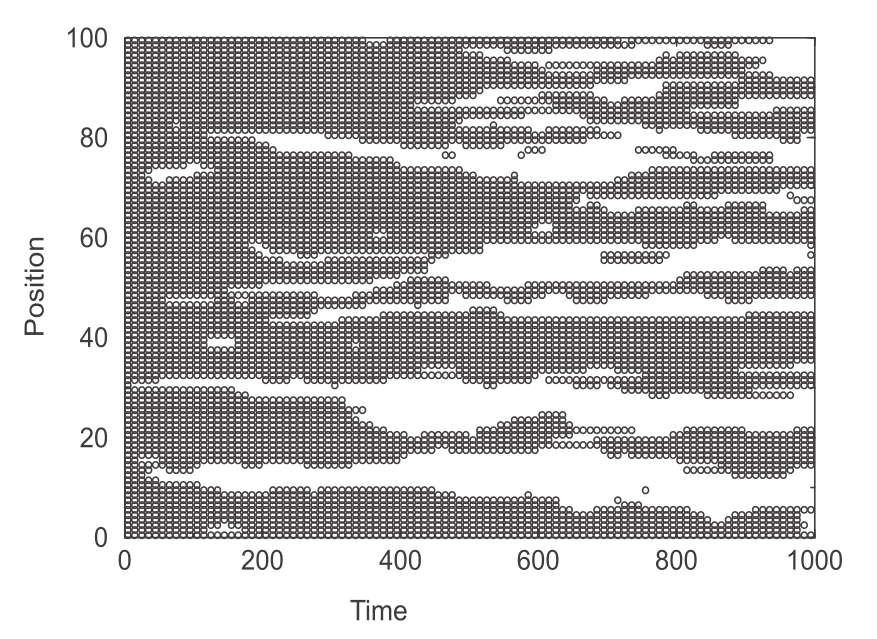

Simulación de un modelo de Ising en 1-D en una rejilla de 100 espines inicialmente alineados. Aunque el sistema comienza con todos los espines arriba (fríos), el sistema forma dominios separados de espines hacia arriba y hacia abajo conforme pasa el tiempo.


### Ejercicio

1. Escriba un programa que implemente el algoritmo Metrópolis para el modelo de Ising en 1-D
2. Imprima regularmente el arreglo que contiene la configuración de los espines ($\texttt{arregloEspines[]}$) para observar la formación de patrones conforme pasa el tiempo.
3. Use como parámetros iniciales $J = 1$ (comportamiento ferromagnético) y $k_BT = 1$ y $N = 20$
4. Use condiciones de contorno periódicas, esto es $\texttt{arregloEspines[0]} = \texttt{arregloEspines[N-1]}$
5. Una vez que la simulación funciones use un $N$ mucho más grande como $N = 10000$
6. Verifique que el sistema tiende al mismo estado de equilibrio para
    - una configuración inicial ordenada (espines fríos)
    - una configuración desordenada (espines calientes)

### Pseudocódigo:

1. Se inicializa un arreglo de N entradas
2. Se inicializan lo valores de los espines todos en una sola dirección o en direcciones aleatorias
3. Se imprime el estado actual del sistema
4. Se calcula la energía del sistema de espines.
5. Se elige un espín del arreglo aleatoriamente.
6. Se calcula la energía del sistema si se cambiara la dirección del espín seleccionado.
7. Se calcula el $\Delta E$
8. Se calcula la probabilidad de aceptación de la transición $P_a$
9. Se acepta o se rechaza la transición
10. Se repite desde 3. 

### Propiedades termodinámicas del modelo de Ising

Para altas temperaturas se espera un arreglo aleatorio de los espines, por lo tanto, una magnetización baja.
Para bajas temperaturas cuando todos los espines están alineados, se espera que la magnetización $\mathcal{M}$ se aproxime a $\frac{N}{2}$, i.e. una magnetización alta.

Mediante esta simulación se pueden calcular la energía interna del modelo y su calor específico:
$$
U(T) = \langle E \rangle\\
c = \dfrac{1}{N}\dfrac{\mathrm{d}U}{\mathrm{d}T}
$$

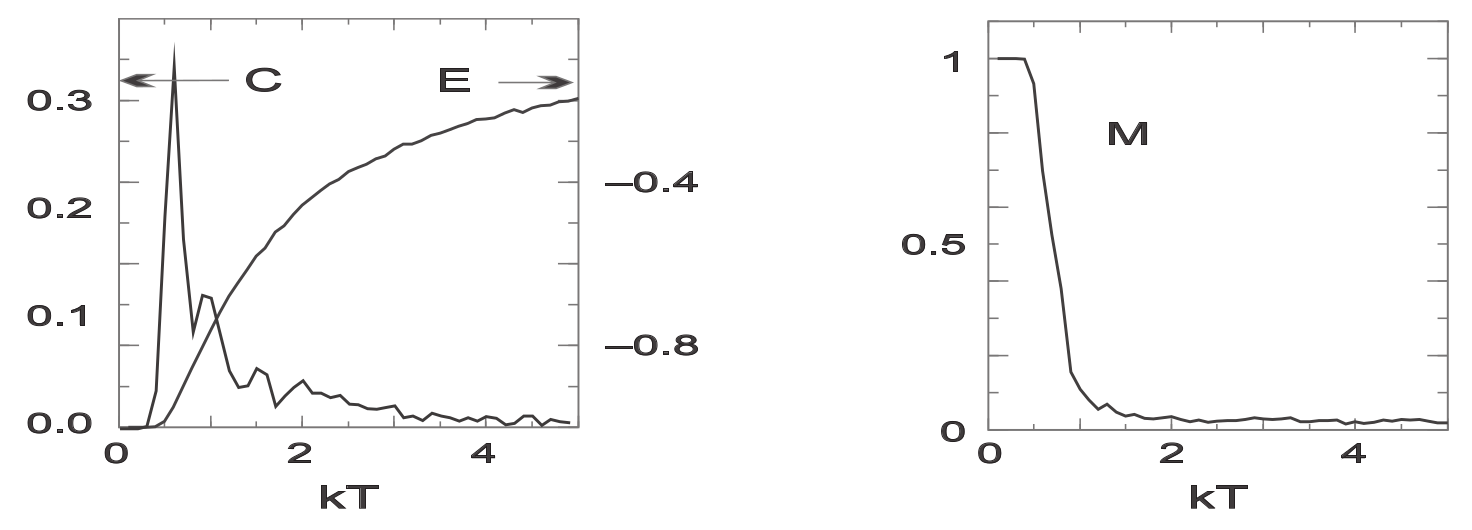

## Referencias

- Krauth, W.(2006). Statistical Mechanics: Algorithms and Computations. Oxford Master Series in Physics. Oxford University Press, UK.
- Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). A Survey of Computational
Physics: Introductory Computational Science. Princeton: Princeton
University Press.
- Newman, M. (2013). Computational Physics. Michigan: University of Michigan.
- Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education